# Exploration Notebook of Tom

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../DATA/defects.csv', sep=',')
data.head()

,x,class
0,355.449335,c
1,92.496236,a
2,141.876795,c
3,431.833902,c
4,435.028461,c


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   class   500 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [9]:
data.describe()

,x
count,500.000000
mean,246.098987
std,143.914271
min,0.700561
25%,123.001773
50%,242.137840
75%,371.495959
max,499.403445


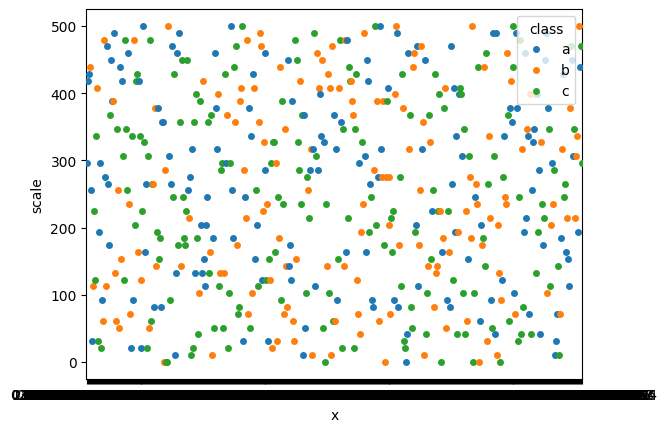

In [15]:
scale = np.linspace(0, 500, 50)

data['scale'] = np.tile(scale, len(data) // len(scale) + 1)[:len(data)]

sns.stripplot(data=data, x='x', y='scale', hue='class')

plt.show()

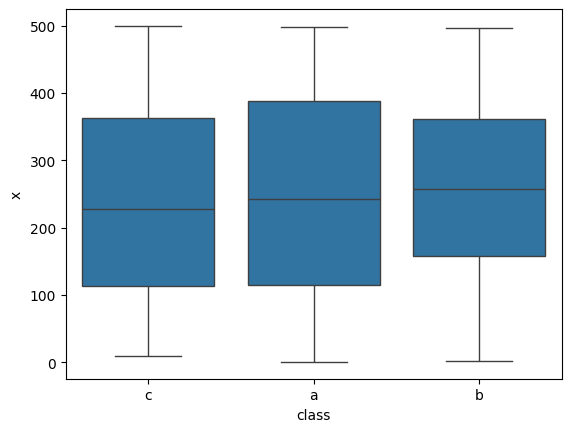

In [29]:
sns.boxplot(data=data, x='class', y='x')

plt.show()

In [35]:
data.drop('scale', axis=1, inplace=True)
data['class'].value_counts()

class
c    177
a    164
b    159
Name: count, dtype: int64

In [36]:

a, b, c = 0, 0, 0
n_a, n_b, n_c = 0, 0, 0
for i in range(0, data.shape[0]):
    if(data.loc[i, 'class'] == 'a'):
        a = a + data.loc[i, 'x']
        n_a = n_a + 1
    elif(data.loc[i, 'class'] == 'b'):
        b = b + data.loc[i, 'x']
        n_b = n_b + 1
    else:
        c = c + data.loc[i, 'x']
        n_c = n_c + 1


    
print("Moyenne de la position l'anomalie a : " + str(a/n_a))
print("Moyenne de la position l'anomalie b : " + str(b/n_b))
print("Moyenne de la position l'anomalie c : " + str(c/n_c))


Moyenne de la position l'anomalie a : 246.60763207226827
Moyenne de la position l'anomalie b : 253.9832389438299
Moyenne de la position l'anomalie c : 238.54523540446505


In [37]:
liste = []

for i in range(0, data.shape[0]):
    if(data.loc[i, 'x'] < 8):
        liste.append([data.loc[i, 'x'], data.loc[i, 'class']])

print(liste)

[[3.998342415845013, 'b'], [2.313037949608188, 'a'], [0.8481851067991264, 'a'], [1.7698245161513748, 'a'], [3.701163868821245, 'a'], [0.7005610475633861, 'a'], [2.2072298478902352, 'b']]


In [38]:
rounded_data= data.copy()

In [39]:
rounded_data['x'] = rounded_data['x'].round(0)


In [40]:
rounded_data.head()

,x,class
0,355.0,c
1,92.0,a
2,142.0,c
3,432.0,c
4,435.0,c


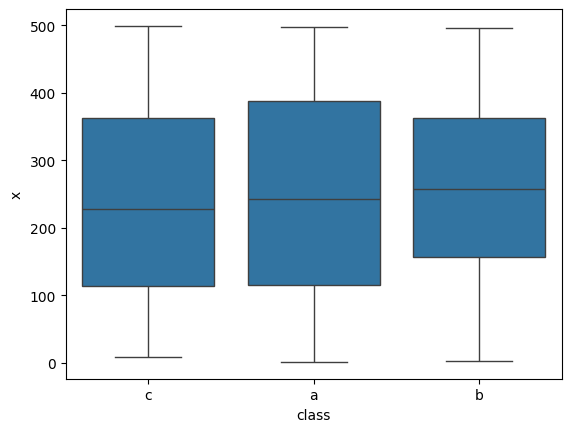

In [41]:
sns.boxplot(data=rounded_data, x='class', y='x')

plt.show()

In [42]:
a, b, c = 0, 0, 0
n_a, n_b, n_c = 0, 0, 0
for i in range(0, rounded_data.shape[0]):
    if(rounded_data.loc[i, 'class'] == 'a'):
        a = a + rounded_data.loc[i, 'x']
        n_a = n_a + 1
    elif(rounded_data.loc[i, 'class'] == 'b'):
        b = b + rounded_data.loc[i, 'x']
        n_b = n_b + 1
    else:
        c = c + rounded_data.loc[i, 'x']
        n_c = n_c + 1


    
print("Moyenne de la position l'anomalie a : " + str(a/n_a))
print("Moyenne de la position l'anomalie b : " + str(b/n_b))
print("Moyenne de la position l'anomalie c : " + str(c/n_c))

Moyenne de la position l'anomalie a : 246.6158536585366
Moyenne de la position l'anomalie b : 253.9433962264151
Moyenne de la position l'anomalie c : 238.51977401129943


In [45]:
from Biscuit import Biscuit

In [70]:
_biscuits = [
    Biscuit(name="Biscuit 0", length=4, value=3, defects_thresholds={'a': 4, 'b': 2, 'c': 3}),
    Biscuit(name="Biscuit 1", length=8, value=12, defects_thresholds={'a': 5, 'b': 4, 'c': 4}),
    Biscuit(name="Biscuit 2", length=2, value=1, defects_thresholds={'a': 1, 'b': 2, 'c': 1}),
    Biscuit(name="Biscuit 3", length=5, value=8, defects_thresholds={'a': 2, 'b': 3, 'c': 2}),
]

In [136]:
def optimize_segment(segment_start, segment_end, defects, biscuits, step):
    total_value = 0
    x = segment_start

    # Liste pour stocker les biscuits placés (nom, position de départ, longueur)
    placed_biscuits = []

    # Générer dynamiquement les biscuits vides en fonction du pas (step)
    empty_biscuits = [
        Biscuit(name=f"no_biscuit_{i}", length=i, value=-i, defects_thresholds={'a': float('inf'), 'b': float('inf'), 'c': float('inf')})
        for i in range(1, 15)  # Créer des biscuits de taille 1 à 14 unités
    ]

    # Ajouter les biscuits vides aux biscuits standards
    biscuits += empty_biscuits

    # Traçage initial de la longueur totale et de la taille des biscuits
    print(f"Longueur totale du segment : {segment_end - segment_start}m")
    for b in biscuits:
        print(f"Biscuit disponible : {b.name}, Longueur : {b.length}, Valeur : {b.value}")

    while x < segment_end:
        placed_biscuit = False
        for biscuit in biscuits:
            # Vérifier s'il y a suffisamment d'espace pour placer le biscuit et s'il respecte les seuils de défauts
            if x + biscuit.length <= segment_end and biscuit.can_place(x, defects):
                total_value += biscuit.value  # Ajouter la valeur du biscuit au total
                # Enregistrer le biscuit placé avec son nom, sa position de départ, et sa longueur
                placed_biscuits.append((biscuit.name, x, biscuit.length))
                x += biscuit.length  # Sauter les positions couvertes par ce biscuit
                placed_biscuit = True

                # Traçage détaillé
                print(f"Biscuit placé : {biscuit.name}, Longueur : {biscuit.length}, Position : {x - biscuit.length}")
                break

        if not placed_biscuit:
            # Si aucun biscuit ne peut être placé, avancer de 'step' et appliquer une pénalité
            total_value -= 1  # Pénalité pour espace vide
            x += 1  # Passer à la prochaine unité entière
            print(f"Aucun biscuit placé, avance de 1 unité, nouvelle position : {x}")

    # Afficher la liste des biscuits placés pour vérifier s'il y a chevauchement ou autre problème
    print(f"Liste des biscuits placés : {placed_biscuits}")
    print(f"Valeur totale calculée pour le segment : {total_value}")

    return total_value, placed_biscuits


In [137]:
result_value, placed_biscuits = optimize_segment(segment_start=0.0, segment_end=500.0, defects=data, biscuits=_biscuits, step=1)

print(f"Valeur totale pour le segment : {result_value}€")
print(f"Biscuits placés : {placed_biscuits}")


Longueur totale du segment : 500.0m
Biscuit disponible : Biscuit 0, Longueur : 4, Valeur : 3
Biscuit disponible : Biscuit 1, Longueur : 8, Valeur : 12
Biscuit disponible : Biscuit 2, Longueur : 2, Valeur : 1
Biscuit disponible : Biscuit 3, Longueur : 5, Valeur : 8
Biscuit disponible : no_biscuit_1, Longueur : 1, Valeur : -1
Biscuit disponible : no_biscuit_2, Longueur : 2, Valeur : -2
Biscuit disponible : no_biscuit_3, Longueur : 3, Valeur : -3
Biscuit disponible : no_biscuit_4, Longueur : 4, Valeur : -4
Biscuit disponible : no_biscuit_5, Longueur : 5, Valeur : -5
Biscuit disponible : no_biscuit_6, Longueur : 6, Valeur : -6
Biscuit disponible : no_biscuit_7, Longueur : 7, Valeur : -7
Biscuit disponible : no_biscuit_8, Longueur : 8, Valeur : -8
Biscuit disponible : no_biscuit_9, Longueur : 9, Valeur : -9
Biscuit disponible : no_biscuit_10, Longueur : 10, Valeur : -10
Biscuit disponible : no_biscuit_11, Longueur : 11, Valeur : -11
Biscuit disponible : no_biscuit_12, Longueur : 12, Valeur 

In [89]:
import math
import random


class Biscuit:
    def __init__(self, name, length, value, defects_thresholds):
        """
        Initialise un biscuit avec un nom, une taille (length), une valeur (value), et des seuils de défauts (defects_thresholds).
        """
        self.name = name
        self.length = length
        self.value = value
        self.defects_thresholds = defects_thresholds  # {'a': max_defects_a, 'b': max_defects_b, 'c': max_defects_c}


    def __repr__(self):
        return f"Biscuit(name={self.name}, length={self.length}, value={self.value}, defects_thresholds={self.defects_thresholds})"

class Chunk:
    def __init__(self, position, defects, is_occupied):
        """
        Initialize a chunk with a position and a dictionary of defects.
        
        Args:
            position (float): The starting position of the chunk.
            defects (dict): A dictionary of defects, where the keys are defect types (e.g., 'a', 'b', 'c')
                            and the values are the counts of each defect in the chunk.
        """
        self.position = position
        self.defects = defects
        self.is_occupied = is_occupied

    def __repr__(self):
        """
        String representation of the chunk object.
        """
        return f"Chunk(position={self.position}, defects={self.defects}, is occupied={self.is_occupied})"

class State:
    def __init__(self, actual_pos = 0, path = None, value = 0):
        self.actual_pos = actual_pos
        self.path = path if path is not None else []
        self.value = value
        
    def __repr__(self):
        return f"State(pos={self.actual_pos} \npath={self.path} \nvalue={self.value})"

class BiscuitOptimization:
    def __init__(self, defects, num_chunks=500, _biscuits=None):
        """
        Initialize the BiscuitOptimization with defects, biscuits, and chunks.

        Args:
            defects (list or DataFrame): A list or dataframe containing defect data.
            num_chunks (int): The number of chunks the problem is divided into (default 500).
            biscuits (list): A list of Biscuit objects (default None, will initialize default biscuits).
        """
        self.num_chunks = num_chunks  # Total number of chunks (default to 500)
        self.defects = defects  # Assign the defects data
        self.current_chunk_pos = 0
        
        # Initialize biscuits if not provided
        if _biscuits is None:
            self._biscuits = [
                Biscuit(name="Biscuit_0", length=4, value=3, defects_thresholds={'a': 4, 'b': 2, 'c': 3}),
                Biscuit(name="Biscuit_1", length=8, value=12, defects_thresholds={'a': 5, 'b': 4, 'c': 4}),
                Biscuit(name="Biscuit_2", length=2, value=1, defects_thresholds={'a': 1, 'b': 2, 'c': 1}),
                Biscuit(name="Biscuit_3", length=5, value=8, defects_thresholds={'a': 2, 'b': 3, 'c': 2}),
            ]
        else:
            self._biscuits = _biscuits

        # Initialize chunks
        self._chunks = []
        for i in range(num_chunks):
            chunk_defects = defects[defects['x'].apply(math.floor) == i]

            # Count the defects by type (e.g., 'a', 'b', 'c')
            defects_count = chunk_defects['class'].value_counts().to_dict()

            # Add chunk with its position, defects, and is_occupied = False
            self._chunks.append(Chunk(position=i, defects=defects_count, is_occupied=False))
    
    def can_place_biscuit(self, start_pos, biscuit):
        if (start_pos + biscuit.length >= self.num_chunks):
            return False
        else:
            a=0
            b=0
            c=0
            for i in range(start_pos, start_pos + biscuit.length):
                a += self._chunks[i].defects.get('a', 0)
                b += self._chunks[i].defects.get('b', 0)
                c += self._chunks[i].defects.get('c', 0)

            if a > biscuit.defects_thresholds['a'] or b > biscuit.defects_thresholds['b'] or c > biscuit.defects_thresholds['c']:
                return False

            return True

    def actions(self, state):
        possible_actions = []
        current_pos = state.actual_pos
        for biscuit in self._biscuits:
            if(self.can_place_biscuit(current_pos, biscuit)):
                possible_actions.append(biscuit)
        return possible_actions
    
    def result(self, state, action):
        state.actual_pos += action.length
        state.path.append((state.actual_pos, action.name))
        state.value += action.value
        for i in range(state.actual_pos, state.actual_pos + action.length):
            self._chunks[i].is_occupied = True

    def is_goal():
        return True


    def is_filled(self, state):
        """
        Vérifie si tous les chunks sont remplis (c'est-à-dire qu'il n'y a plus de place pour des biscuits).
        
        Args:
            state (State): L'état actuel du problème.
        
        Returns:
            bool: True si tous les chunks sont remplis, sinon False.
        """
        return state.actual_pos >= self.num_chunks

    def initialize_population(self, population_size):
        """
        Crée une population initiale de solutions. Chaque solution est une séquence d'actions (placement de biscuits).

        Args:
            population_size (int): Taille de la population.
        
        Returns:
            list: Liste d'individus (états) représentant la population initiale.
        """
        population = []
        for _ in range(population_size):
            # Générer une séquence d'actions (état) de façon aléatoire
            state = State()  # Créer un état initial
            while not self.is_filled(state):  # Tant que tous les chunks ne sont pas remplis
                possible_actions = self.actions(state)
                if possible_actions:
                    action = random.choice(possible_actions)  # Choisir une action aléatoire
                    self.result(state, action)  # Appliquer l'action à l'état (sans réaffecter)
                else:
                    break
            population.append(state)
        return population 

    def fitness(self, state):
        """
        Calcule la valeur de l'état (fitness) en fonction des biscuits placés.

        Args:
            state (State): L'état pour lequel calculer le fitness.
        
        Returns:
            float: Valeur du fitness, ici basée sur la valeur totale des biscuits placés moins les espaces vides.
        """
        total_value = state.value
        # Penalty pour les chunks vides
        empty_chunks = sum(1 for chunk in self._chunks if chunk.is_occupied == False)
        total_value -= empty_chunks  # Pénalise chaque chunk vide
        return total_value

    def selection(self, population, fitness_scores):
        """
        Sélectionne deux individus dans la population en fonction de leur fitness.

        Args:
            population (list): Liste des individus de la population.
            fitness_scores (list): Liste des scores de fitness pour chaque individu.
        
        Returns:
            tuple: Deux individus sélectionnés pour le croisement.
        """
        # Utiliser un mécanisme comme la roulette pour sélectionner en fonction du fitness
        total_fitness = sum(fitness_scores)
        selection_probs = [score / total_fitness for score in fitness_scores]
        
        # Sélectionner deux individus
        parent1 = random.choices(population, weights=selection_probs, k=1)[0]
        parent2 = random.choices(population, weights=selection_probs, k=1)[0]
        
        return parent1, parent2
    
    def crossover(self, parent1, parent2):
        """
        Combine deux parents pour produire un nouvel individu (un état).

        Args:
            parent1 (State): Premier parent.
            parent2 (State): Deuxième parent.
        
        Returns:
            State: Nouvel individu résultant du croisement.
        """
        # Crossover en prenant des éléments des deux parents
        crossover_point = random.randint(0, min(len(parent1.path), len(parent2.path)) - 1)
        child_path = parent1.path[:crossover_point] + parent2.path[crossover_point:]
        
        # Créer un nouvel état à partir du chemin résultant
        child = State(actual_pos=child_path[-1][0], path=child_path, value=0)
        for _, biscuit_name in child_path:
            biscuit = next(b for b in self._biscuits if b.name == biscuit_name)
            child.value += biscuit.value
        return child
    
    def mutate(self, individual, mutation_rate=0.1):
        """
        Applique une mutation à un individu avec une probabilité définie.

        Args:
            individual (State): L'individu à muter.
            mutation_rate (float): Probabilité de mutation (par défaut 10%).

        Returns:
            State: L'individu potentiellement muté.
        """
        if random.random() < mutation_rate:
            # Appliquer une mutation : remplacer une action par une autre aléatoire
            mutation_point = random.randint(0, len(individual.path) - 1)
            possible_actions = self.actions(individual)
            if possible_actions:
                new_action = random.choice(possible_actions)
                individual.path[mutation_point] = (individual.path[mutation_point][0], new_action.name)
                individual.value = sum(next(b for b in self._biscuits if b.name == name).value for _, name in individual.path)
        return individual
    
    def evolve_generation(self, population, mutation_rate):
        """
        Fait évoluer la population d'une génération en appliquant sélection, crossover et mutation.
        
        Args:
            population (list): La population actuelle (liste d'individus).
            mutation_rate (float): Le taux de mutation.
        
        Returns:
            list: Nouvelle population après évolution.
        """
        new_population = []
        fitness_scores = [self.fitness(individual) for individual in population]
        
        # Sélection et création de la nouvelle population
        for _ in range(len(population)):
            # Sélection de deux parents
            parent1, parent2 = self.selection(population, fitness_scores)
            
            # Crossover pour créer un enfant
            child = self.crossover(parent1, parent2)
            
            # Mutation potentielle de l'enfant
            child = self.mutate(child, mutation_rate)
            
            # Ajout de l'enfant à la nouvelle population
            new_population.append(child)
        
        return new_population


    def get_best_candidate(self, population):
        """
        Retourne l'individu avec la meilleure valeur dans la population.
        """
        best = max(population, key=lambda individual: self.fitness(individual))
        return best

    def evolve(self, population_size, generations, mutation_rate):
        """
        Evolue la population sur plusieurs générations.

        Args:
            population_size (int): Nombre d'individus dans la population.
            generations (int): Nombre de générations pour l'évolution.
            mutation_rate (float): Taux de mutation à appliquer à chaque génération.
            
        Returns:
            best_solution: Le meilleur individu après l'évolution.
        """
        # Initialisation de la population (tu dois déjà avoir cette logique)
        population = self.initialize_population(population_size)
        
        best_solution = None

        # Boucle sur les générations sans barre de progression
        for generation in range(generations):
            # Évaluation de la population (fitness, sélection, croisement, mutation)
            population = self.evolve_generation(population, mutation_rate)
            
            # Trouver la meilleure solution de la génération courante
            best_candidate = self.get_best_candidate(population)
            
            if best_solution is None or best_candidate.value > best_solution.value:
                best_solution = best_candidate
        
        return best_solution
    
    def method_1(self):
        biscuit_order = [self._biscuits[1], self._biscuits[2], self._biscuits[3],self._biscuits[1]]
        state = State(actual_pos=0, path=[], value=0)

        print(len(self._chunks))

        for biscuit in biscuit_order:
            for chunk in self._chunks:
                if chunk.is_occupied == False:
                    if chunk.position == 499:
                        break
                    if self.can_place_biscuit(chunk.position, biscuit):
                        self.result(state, biscuit)
                        print(state.__repr__())

        return (state.value, state.path)



In [47]:
pb = BiscuitOptimization(data)
pb.is_filled

<bound method BiscuitOptimization.is_filled of <__main__.BiscuitOptimization object at 0x00000185D3F2ECF0>>

In [34]:
# Initialisation de l'optimiseur
biscuit_optimizer = BiscuitOptimization(data)

# Evolution avec suivi de progression
best_solution = biscuit_optimizer.evolve(
    population_size=100,  # Nombre d'individus dans la population
    generations=500,       # Nombre de générations
    mutation_rate=0.1     # Taux de mutation
)

# Affichage de la meilleure solution
print("Best solution found:")
print("Path:", best_solution.path)
print("Total value:", best_solution.value)

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (31, 'Biscuit_1'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (71, 'Biscuit_0'), (75, 'Biscuit_0'), (77, 'Biscuit_2'), (81, 'Biscuit_0'), (83, 'Biscuit_2'), (87, 'Biscuit_0'), (95, 'Biscuit_1'), (80, 'Biscuit_0'), (88, 'Biscuit_1'), (92, 'Biscuit_0'), (96, 'Biscuit_0')]
Total value: 150


In [36]:
# Initialisation de l'optimiseur
biscuit_optimizer = BiscuitOptimization(data)

# Evolution avec suivi de progression
best_solution = biscuit_optimizer.evolve(
    population_size=200,  # Nombre d'individus dans la population
    generations=50,       # Nombre de générations
    mutation_rate=0.1     # Taux de mutation
)

# Affichage de la meilleure solution
print("Best solution found:")
print("Path:", best_solution.path)
print("Total value:", best_solution.value)

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (66, 'Biscuit_1'), (68, 'Biscuit_2'), (70, 'Biscuit_2'), (72, 'Biscuit_2'), (74, 'Biscuit_2'), (78, 'Biscuit_0'), (86, 'Biscuit_1'), (90, 'Biscuit_0'), (94, 'Biscuit_0')]
Total value: 148


In [37]:
# Initialisation de l'optimiseur
biscuit_optimizer = BiscuitOptimization(data)

# Evolution avec suivi de progression
best_solution = biscuit_optimizer.evolve(
    population_size=200,  # Nombre d'individus dans la population
    generations=500,       # Nombre de générations
    mutation_rate=0.1     # Taux de mutation
)

# Affichage de la meilleure solution
print("Best solution found:")
print("Path:", best_solution.path)
print("Total value:", best_solution.value)

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (74, 'Biscuit_0'), (78, 'Biscuit_0'), (83, 'Biscuit_3'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 142


In [38]:
# Initialisation de l'optimiseur
biscuit_optimizer = BiscuitOptimization(data)

# Evolution avec suivi de progression
best_solution = biscuit_optimizer.evolve(
    population_size=200,  # Nombre d'individus dans la population
    generations=2000,       # Nombre de générations
    mutation_rate=0.1     # Taux de mutation
)

# Affichage de la meilleure solution
print("Best solution found:")
print("Path:", best_solution.path)
print("Total value:", best_solution.value)

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_0'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (34, 'Biscuit_0'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 143


In [39]:
from tqdm import tqdm

values = []
# Utiliser tqdm pour afficher la progression des itérations
for i in tqdm(range(0, 100), desc="Optimisation en cours"):
    biscuit_optimizer = BiscuitOptimization(data)

    # Evolution avec suivi de progression
    best_solution = biscuit_optimizer.evolve(
        population_size=100,  # Nombre d'individus dans la population
        generations=500,       # Nombre de générations
        mutation_rate=0.1     # Taux de mutation
    )

    # Affichage de la meilleure solution
    print("Best solution found:")
    print("Path:", best_solution.path)
    print("Total value:", best_solution.value)
    values.append(best_solution.value)

Optimisation en cours:   1%|          | 1/100 [00:04<07:58,  4.83s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (33, 'Biscuit_1'), (35, 'Biscuit_2'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (68, 'Biscuit_2'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (93, 'Biscuit_0'), (89, 'Biscuit_1'), (91, 'Biscuit_2'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 166


Optimisation en cours:   2%|▏         | 2/100 [00:09<07:53,  4.83s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (36, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (68, 'Biscuit_0'), (70, 'Biscuit_2'), (67, 'Biscuit_3'), (72, 'Biscuit_3'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 137


Optimisation en cours:   3%|▎         | 3/100 [00:14<07:54,  4.89s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (31, 'Biscuit_3'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (92, 'Biscuit_1'), (96, 'Biscuit_0')]
Total value: 147


Optimisation en cours:   4%|▍         | 4/100 [00:19<08:01,  5.02s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (71, 'Biscuit_1'), (73, 'Biscuit_2'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (97, 'Biscuit_1')]
Total value: 132


Optimisation en cours:   5%|▌         | 5/100 [00:24<07:54,  4.99s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (31, 'Biscuit_2'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (72, 'Biscuit_2'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (88, 'Biscuit_0'), (93, 'Biscuit_3'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 133


Optimisation en cours:   6%|▌         | 6/100 [00:29<07:41,  4.91s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (26, 'Biscuit_1'), (33, 'Biscuit_1'), (35, 'Biscuit_2'), (30, 'Biscuit_2'), (35, 'Biscuit_3'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (66, 'Biscuit_0'), (71, 'Biscuit_3'), (79, 'Biscuit_1'), (81, 'Biscuit_2'), (89, 'Biscuit_1'), (91, 'Biscuit_2'), (93, 'Biscuit_2'), (79, 'Biscuit_0'), (84, 'Biscuit_3'), (89, 'Biscuit_3'), (97, 'Biscuit_1')]
Total value: 149


Optimisation en cours:   7%|▋         | 7/100 [00:34<07:41,  4.96s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (82, 'Biscuit_0'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 148


Optimisation en cours:   8%|▊         | 8/100 [00:40<07:49,  5.10s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_2'), (31, 'Biscuit_1'), (35, 'Biscuit_0'), (31, 'Biscuit_3'), (35, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (88, 'Biscuit_1'), (90, 'Biscuit_2'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 137


Optimisation en cours:   9%|▉         | 9/100 [00:46<08:10,  5.39s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (77, 'Biscuit_2'), (85, 'Biscuit_1'), (89, 'Biscuit_0'), (97, 'Biscuit_1')]
Total value: 139


Optimisation en cours:  10%|█         | 10/100 [00:51<08:15,  5.51s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (28, 'Biscuit_1'), (28, 'Biscuit_1'), (31, 'Biscuit_3'), (33, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (68, 'Biscuit_0'), (70, 'Biscuit_2'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (93, 'Biscuit_3'), (97, 'Biscuit_0')]
Total value: 140


Optimisation en cours:  11%|█         | 11/100 [00:56<07:55,  5.34s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (23, 'Biscuit_3'), (36, 'Biscuit_1'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (37, 'Biscuit_2'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (68, 'Biscuit_0'), (76, 'Biscuit_1'), (84, 'Biscuit_1'), (72, 'Biscuit_0'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 158


Optimisation en cours:  12%|█▏        | 12/100 [01:02<07:51,  5.36s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (27, 'Biscuit_0'), (31, 'Biscuit_0'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (71, 'Biscuit_3'), (73, 'Biscuit_2'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (91, 'Biscuit_2'), (93, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 146


Optimisation en cours:  13%|█▎        | 13/100 [01:11<09:24,  6.49s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (68, 'Biscuit_0'), (76, 'Biscuit_1'), (84, 'Biscuit_1'), (92, 'Biscuit_1'), (96, 'Biscuit_0')]
Total value: 134


Optimisation en cours:  14%|█▍        | 14/100 [01:18<09:40,  6.75s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (33, 'Biscuit_1'), (35, 'Biscuit_2'), (36, 'Biscuit_2'), (37, 'Biscuit_2'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (68, 'Biscuit_3'), (70, 'Biscuit_2'), (78, 'Biscuit_1'), (83, 'Biscuit_3'), (87, 'Biscuit_0'), (78, 'Biscuit_1'), (82, 'Biscuit_0'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 139


Optimisation en cours:  15%|█▌        | 15/100 [01:24<09:14,  6.52s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (64, 'Biscuit_2'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (93, 'Biscuit_0'), (97, 'Biscuit_0')]
Total value: 149


Optimisation en cours:  16%|█▌        | 16/100 [01:29<08:37,  6.16s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (34, 'Biscuit_1'), (35, 'Biscuit_1'), (37, 'Biscuit_2'), (30, 'Biscuit_2'), (34, 'Biscuit_0'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (71, 'Biscuit_0'), (73, 'Biscuit_2'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (97, 'Biscuit_1')]
Total value: 147


Optimisation en cours:  17%|█▋        | 17/100 [01:35<08:15,  5.97s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (62, 'Biscuit_0'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (80, 'Biscuit_2'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 135


Optimisation en cours:  18%|█▊        | 18/100 [01:40<07:56,  5.81s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_2'), (36, 'Biscuit_1'), (35, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (60, 'Biscuit_0'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (77, 'Biscuit_2'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (89, 'Biscuit_3'), (97, 'Biscuit_1')]
Total value: 148


Optimisation en cours:  19%|█▉        | 19/100 [01:46<07:47,  5.78s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (86, 'Biscuit_1'), (56, 'Biscuit_2'), (60, 'Biscuit_0'), (65, 'Biscuit_3'), (70, 'Biscuit_3'), (72, 'Biscuit_2'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (92, 'Biscuit_1'), (96, 'Biscuit_0')]
Total value: 168


Optimisation en cours:  20%|██        | 20/100 [01:52<07:37,  5.72s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (88, 'Biscuit_0'), (75, 'Biscuit_0'), (77, 'Biscuit_2'), (85, 'Biscuit_1'), (89, 'Biscuit_0'), (97, 'Biscuit_1')]
Total value: 140


Optimisation en cours:  21%|██        | 21/100 [01:57<07:29,  5.69s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (23, 'Biscuit_2'), (31, 'Biscuit_1'), (36, 'Biscuit_3'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (72, 'Biscuit_3'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 149


Optimisation en cours:  22%|██▏       | 22/100 [02:03<07:17,  5.61s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (83, 'Biscuit_1'), (91, 'Biscuit_1'), (95, 'Biscuit_0'), (97, 'Biscuit_2')]
Total value: 141


Optimisation en cours:  23%|██▎       | 23/100 [02:08<07:06,  5.54s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (62, 'Biscuit_0'), (67, 'Biscuit_3'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (88, 'Biscuit_0'), (81, 'Biscuit_0'), (89, 'Biscuit_1'), (91, 'Biscuit_2'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 130


Optimisation en cours:  24%|██▍       | 24/100 [02:14<07:08,  5.63s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (68, 'Biscuit_3'), (76, 'Biscuit_1'), (84, 'Biscuit_1'), (92, 'Biscuit_1'), (96, 'Biscuit_0')]
Total value: 128


Optimisation en cours:  25%|██▌       | 25/100 [02:20<07:06,  5.68s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (26, 'Biscuit_1'), (28, 'Biscuit_2'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (83, 'Biscuit_1'), (87, 'Biscuit_0'), (74, 'Biscuit_0'), (78, 'Biscuit_0'), (83, 'Biscuit_3'), (87, 'Biscuit_0'), (95, 'Biscuit_1'), (97, 'Biscuit_2')]
Total value: 147


Optimisation en cours:  26%|██▌       | 26/100 [02:25<06:56,  5.63s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (33, 'Biscuit_0'), (35, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (66, 'Biscuit_0'), (74, 'Biscuit_1'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (74, 'Biscuit_1'), (78, 'Biscuit_0'), (82, 'Biscuit_0'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 145


Optimisation en cours:  27%|██▋       | 27/100 [02:31<06:49,  5.60s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (96, 'Biscuit_1')]
Total value: 133


Optimisation en cours:  28%|██▊       | 28/100 [02:36<06:44,  5.62s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (26, 'Biscuit_0'), (31, 'Biscuit_3'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (58, 'Biscuit_2'), (62, 'Biscuit_0'), (70, 'Biscuit_1'), (72, 'Biscuit_2'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (93, 'Biscuit_3'), (97, 'Biscuit_0')]
Total value: 135


Optimisation en cours:  29%|██▉       | 29/100 [02:42<06:41,  5.66s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_1'), (31, 'Biscuit_3'), (33, 'Biscuit_2'), (32, 'Biscuit_2'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (60, 'Biscuit_0'), (62, 'Biscuit_2'), (64, 'Biscuit_2'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (96, 'Biscuit_1')]
Total value: 131


Optimisation en cours:  30%|███       | 30/100 [02:48<06:42,  5.75s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_0'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (60, 'Biscuit_0'), (68, 'Biscuit_1'), (76, 'Biscuit_1'), (84, 'Biscuit_1'), (89, 'Biscuit_3'), (93, 'Biscuit_0'), (97, 'Biscuit_0')]
Total value: 152


Optimisation en cours:  31%|███       | 31/100 [02:54<06:35,  5.73s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (70, 'Biscuit_0'), (78, 'Biscuit_1'), (80, 'Biscuit_2'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 147


Optimisation en cours:  32%|███▏      | 32/100 [02:59<06:26,  5.68s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (26, 'Biscuit_0'), (30, 'Biscuit_0'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (66, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 142


Optimisation en cours:  33%|███▎      | 33/100 [03:05<06:21,  5.69s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (27, 'Biscuit_0'), (34, 'Biscuit_1'), (36, 'Biscuit_1'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (68, 'Biscuit_2'), (70, 'Biscuit_2'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (83, 'Biscuit_2'), (87, 'Biscuit_0'), (89, 'Biscuit_2'), (97, 'Biscuit_1')]
Total value: 141


Optimisation en cours:  34%|███▍      | 34/100 [03:11<06:14,  5.68s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (66, 'Biscuit_0'), (70, 'Biscuit_0'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 124


Optimisation en cours:  35%|███▌      | 35/100 [03:16<06:07,  5.65s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (25, 'Biscuit_0'), (32, 'Biscuit_1'), (35, 'Biscuit_1'), (37, 'Biscuit_2'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (75, 'Biscuit_1'), (83, 'Biscuit_1'), (91, 'Biscuit_1'), (95, 'Biscuit_0'), (96, 'Biscuit_0')]
Total value: 142


Optimisation en cours:  36%|███▌      | 36/100 [03:22<06:03,  5.68s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (80, 'Biscuit_1'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 155


Optimisation en cours:  37%|███▋      | 37/100 [03:28<05:57,  5.67s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (31, 'Biscuit_1'), (33, 'Biscuit_2'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (90, 'Biscuit_2'), (94, 'Biscuit_0')]
Total value: 144


Optimisation en cours:  38%|███▊      | 38/100 [03:33<05:50,  5.65s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (25, 'Biscuit_0'), (29, 'Biscuit_0'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (68, 'Biscuit_0'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (93, 'Biscuit_0'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 138


Optimisation en cours:  39%|███▉      | 39/100 [03:39<05:40,  5.59s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (31, 'Biscuit_1'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (69, 'Biscuit_2'), (77, 'Biscuit_1'), (82, 'Biscuit_3'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 137


Optimisation en cours:  40%|████      | 40/100 [03:45<05:37,  5.62s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (31, 'Biscuit_2'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (82, 'Biscuit_0'), (71, 'Biscuit_3'), (73, 'Biscuit_2'), (81, 'Biscuit_1'), (83, 'Biscuit_2'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 152


Optimisation en cours:  41%|████      | 41/100 [03:50<05:28,  5.57s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (23, 'Biscuit_3'), (31, 'Biscuit_1'), (35, 'Biscuit_0'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (58, 'Biscuit_2'), (64, 'Biscuit_1'), (68, 'Biscuit_0'), (72, 'Biscuit_0'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (90, 'Biscuit_2'), (94, 'Biscuit_0')]
Total value: 134


Optimisation en cours:  42%|████▏     | 42/100 [03:55<05:21,  5.54s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (63, 'Biscuit_0'), (68, 'Biscuit_3'), (73, 'Biscuit_3'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 139


Optimisation en cours:  43%|████▎     | 43/100 [04:01<05:16,  5.55s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (68, 'Biscuit_0'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (83, 'Biscuit_2'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 138


Optimisation en cours:  44%|████▍     | 44/100 [04:07<05:11,  5.56s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_0'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (89, 'Biscuit_3'), (93, 'Biscuit_0'), (97, 'Biscuit_0')]
Total value: 136


Optimisation en cours:  45%|████▌     | 45/100 [04:12<05:07,  5.59s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (26, 'Biscuit_0'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (72, 'Biscuit_2'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (92, 'Biscuit_0'), (96, 'Biscuit_0')]
Total value: 135


Optimisation en cours:  46%|████▌     | 46/100 [04:18<05:09,  5.72s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (58, 'Biscuit_2'), (66, 'Biscuit_1'), (70, 'Biscuit_0'), (78, 'Biscuit_1'), (86, 'Biscuit_1'), (70, 'Biscuit_1'), (72, 'Biscuit_2'), (80, 'Biscuit_1'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 154


Optimisation en cours:  47%|████▋     | 47/100 [04:24<05:08,  5.82s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (85, 'Biscuit_1'), (90, 'Biscuit_3'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 152


Optimisation en cours:  48%|████▊     | 48/100 [04:30<05:06,  5.90s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (28, 'Biscuit_1'), (33, 'Biscuit_1'), (35, 'Biscuit_3'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (72, 'Biscuit_3'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (93, 'Biscuit_3'), (97, 'Biscuit_0')]
Total value: 137


Optimisation en cours:  49%|████▉     | 49/100 [04:37<05:03,  5.96s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (68, 'Biscuit_0'), (72, 'Biscuit_0'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 143


Optimisation en cours:  50%|█████     | 50/100 [04:43<04:59,  5.99s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (68, 'Biscuit_3'), (73, 'Biscuit_3'), (77, 'Biscuit_0'), (82, 'Biscuit_3'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 132


Optimisation en cours:  51%|█████     | 51/100 [04:48<04:51,  5.94s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (23, 'Biscuit_3'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (35, 'Biscuit_2'), (37, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (67, 'Biscuit_1'), (71, 'Biscuit_0'), (73, 'Biscuit_2'), (77, 'Biscuit_0'), (85, 'Biscuit_1'), (90, 'Biscuit_3'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 162


Optimisation en cours:  52%|█████▏    | 52/100 [04:54<04:40,  5.85s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (31, 'Biscuit_3'), (35, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (62, 'Biscuit_0'), (70, 'Biscuit_1'), (72, 'Biscuit_2'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (92, 'Biscuit_1'), (96, 'Biscuit_0')]
Total value: 136


Optimisation en cours:  53%|█████▎    | 53/100 [05:00<04:35,  5.85s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_0'), (33, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (72, 'Biscuit_3'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 158


Optimisation en cours:  54%|█████▍    | 54/100 [05:06<04:28,  5.84s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (18, 'Biscuit_2'), (26, 'Biscuit_1'), (28, 'Biscuit_1'), (33, 'Biscuit_3'), (35, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (65, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (75, 'Biscuit_1'), (77, 'Biscuit_2'), (81, 'Biscuit_0'), (89, 'Biscuit_1'), (97, 'Biscuit_1')]
Total value: 152


Optimisation en cours:  55%|█████▌    | 55/100 [05:11<04:20,  5.78s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (27, 'Biscuit_0'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (60, 'Biscuit_0'), (65, 'Biscuit_3'), (67, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (71, 'Biscuit_3'), (75, 'Biscuit_0'), (83, 'Biscuit_1'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 141


Optimisation en cours:  56%|█████▌    | 56/100 [05:17<04:14,  5.78s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (72, 'Biscuit_3'), (80, 'Biscuit_1'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (93, 'Biscuit_0'), (97, 'Biscuit_0')]
Total value: 158


Optimisation en cours:  57%|█████▋    | 57/100 [05:23<04:07,  5.76s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (33, 'Biscuit_0'), (28, 'Biscuit_2'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (72, 'Biscuit_3'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 136


Optimisation en cours:  58%|█████▊    | 58/100 [05:29<04:01,  5.76s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (23, 'Biscuit_3'), (33, 'Biscuit_1'), (36, 'Biscuit_3'), (37, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (48, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (83, 'Biscuit_1'), (71, 'Biscuit_1'), (79, 'Biscuit_1'), (87, 'Biscuit_1'), (89, 'Biscuit_2'), (97, 'Biscuit_1')]
Total value: 170


Optimisation en cours:  59%|█████▉    | 59/100 [05:34<03:56,  5.76s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (31, 'Biscuit_2'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (88, 'Biscuit_1'), (93, 'Biscuit_3'), (97, 'Biscuit_0')]
Total value: 129


Optimisation en cours:  60%|██████    | 60/100 [05:40<03:50,  5.75s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_1'), (31, 'Biscuit_1'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (83, 'Biscuit_1'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 153


Optimisation en cours:  61%|██████    | 61/100 [05:46<03:43,  5.73s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (28, 'Biscuit_1'), (31, 'Biscuit_3'), (35, 'Biscuit_1'), (37, 'Biscuit_2'), (33, 'Biscuit_3'), (36, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (70, 'Biscuit_0'), (78, 'Biscuit_1'), (82, 'Biscuit_0'), (84, 'Biscuit_1'), (92, 'Biscuit_1'), (96, 'Biscuit_0')]
Total value: 138


Optimisation en cours:  62%|██████▏   | 62/100 [05:52<03:43,  5.88s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (23, 'Biscuit_3'), (31, 'Biscuit_1'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (58, 'Biscuit_2'), (62, 'Biscuit_0'), (70, 'Biscuit_1'), (72, 'Biscuit_2'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 132


Optimisation en cours:  63%|██████▎   | 63/100 [05:58<03:36,  5.84s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (23, 'Biscuit_3'), (33, 'Biscuit_1'), (35, 'Biscuit_0'), (37, 'Biscuit_2'), (34, 'Biscuit_0'), (37, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (83, 'Biscuit_2'), (87, 'Biscuit_0'), (89, 'Biscuit_2'), (91, 'Biscuit_2'), (95, 'Biscuit_0'), (97, 'Biscuit_2')]
Total value: 143


Optimisation en cours:  64%|██████▍   | 64/100 [06:04<03:30,  5.86s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (31, 'Biscuit_2'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (71, 'Biscuit_1'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (69, 'Biscuit_2'), (73, 'Biscuit_0'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (91, 'Biscuit_2'), (95, 'Biscuit_0'), (97, 'Biscuit_2')]
Total value: 148


Optimisation en cours:  65%|██████▌   | 65/100 [06:09<03:23,  5.81s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (70, 'Biscuit_0'), (78, 'Biscuit_1'), (86, 'Biscuit_1'), (88, 'Biscuit_2'), (93, 'Biscuit_3'), (97, 'Biscuit_0')]
Total value: 135


Optimisation en cours:  66%|██████▌   | 66/100 [06:15<03:15,  5.75s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (31, 'Biscuit_2'), (36, 'Biscuit_3'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (92, 'Biscuit_1'), (80, 'Biscuit_0'), (88, 'Biscuit_1'), (96, 'Biscuit_1')]
Total value: 154


Optimisation en cours:  67%|██████▋   | 67/100 [06:21<03:08,  5.71s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (23, 'Biscuit_2'), (31, 'Biscuit_1'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (88, 'Biscuit_1'), (92, 'Biscuit_0'), (96, 'Biscuit_0')]
Total value: 140


Optimisation en cours:  68%|██████▊   | 68/100 [06:26<03:00,  5.65s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (31, 'Biscuit_1'), (31, 'Biscuit_0'), (36, 'Biscuit_3'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 149


Optimisation en cours:  69%|██████▉   | 69/100 [06:32<02:53,  5.60s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (83, 'Biscuit_3'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 134


Optimisation en cours:  70%|███████   | 70/100 [06:37<02:47,  5.58s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (88, 'Biscuit_0'), (96, 'Biscuit_1')]
Total value: 139


Optimisation en cours:  71%|███████   | 71/100 [06:43<02:41,  5.57s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (28, 'Biscuit_1'), (28, 'Biscuit_1'), (32, 'Biscuit_0'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (72, 'Biscuit_3'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 131


Optimisation en cours:  72%|███████▏  | 72/100 [06:48<02:35,  5.55s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (26, 'Biscuit_0'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (63, 'Biscuit_0'), (65, 'Biscuit_2'), (70, 'Biscuit_3'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 130


Optimisation en cours:  73%|███████▎  | 73/100 [06:54<02:31,  5.60s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (20, 'Biscuit_0'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (62, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (67, 'Biscuit_0'), (71, 'Biscuit_0'), (79, 'Biscuit_1'), (84, 'Biscuit_3'), (92, 'Biscuit_1'), (96, 'Biscuit_0')]
Total value: 132


Optimisation en cours:  74%|███████▍  | 74/100 [06:59<02:21,  5.43s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (63, 'Biscuit_0'), (71, 'Biscuit_1'), (79, 'Biscuit_1'), (81, 'Biscuit_2'), (83, 'Biscuit_2'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (83, 'Biscuit_1'), (91, 'Biscuit_1'), (95, 'Biscuit_0'), (97, 'Biscuit_2')]
Total value: 144


Optimisation en cours:  75%|███████▌  | 75/100 [07:04<02:12,  5.30s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_1'), (33, 'Biscuit_3'), (32, 'Biscuit_3'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (80, 'Biscuit_2'), (88, 'Biscuit_1'), (90, 'Biscuit_2'), (92, 'Biscuit_2'), (68, 'Biscuit_3'), (70, 'Biscuit_2'), (74, 'Biscuit_0'), (78, 'Biscuit_0'), (86, 'Biscuit_1'), (88, 'Biscuit_2'), (92, 'Biscuit_0'), (96, 'Biscuit_0')]
Total value: 154


Optimisation en cours:  76%|███████▌  | 76/100 [07:09<02:04,  5.20s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_0'), (32, 'Biscuit_0'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (62, 'Biscuit_0'), (67, 'Biscuit_3'), (75, 'Biscuit_1'), (83, 'Biscuit_1'), (72, 'Biscuit_0'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 137


Optimisation en cours:  77%|███████▋  | 77/100 [07:14<01:57,  5.10s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (35, 'Biscuit_2'), (37, 'Biscuit_2'), (37, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (75, 'Biscuit_1'), (79, 'Biscuit_0'), (81, 'Biscuit_2'), (83, 'Biscuit_2'), (91, 'Biscuit_1'), (95, 'Biscuit_0'), (97, 'Biscuit_2')]
Total value: 148


Optimisation en cours:  78%|███████▊  | 78/100 [07:19<01:54,  5.20s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (72, 'Biscuit_1'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (88, 'Biscuit_0'), (92, 'Biscuit_0'), (96, 'Biscuit_0')]
Total value: 139


Optimisation en cours:  79%|███████▉  | 79/100 [07:25<01:52,  5.37s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (31, 'Biscuit_1'), (30, 'Biscuit_0'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (83, 'Biscuit_3'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 156


Optimisation en cours:  80%|████████  | 80/100 [07:31<01:49,  5.46s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_1'), (34, 'Biscuit_1'), (35, 'Biscuit_0'), (37, 'Biscuit_2'), (48, 'Biscuit_1'), (37, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (71, 'Biscuit_0'), (79, 'Biscuit_1'), (87, 'Biscuit_1'), (95, 'Biscuit_1'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 156


Optimisation en cours:  81%|████████  | 81/100 [07:36<01:45,  5.55s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (26, 'Biscuit_1'), (31, 'Biscuit_1'), (35, 'Biscuit_0'), (35, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (63, 'Biscuit_3'), (63, 'Biscuit_3'), (68, 'Biscuit_3'), (70, 'Biscuit_2'), (78, 'Biscuit_1'), (80, 'Biscuit_2'), (88, 'Biscuit_1'), (96, 'Biscuit_1')]
Total value: 144


Optimisation en cours:  82%|████████▏ | 82/100 [07:42<01:40,  5.61s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (22, 'Biscuit_2'), (26, 'Biscuit_0'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (72, 'Biscuit_2'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (83, 'Biscuit_2'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 140


Optimisation en cours:  83%|████████▎ | 83/100 [07:48<01:35,  5.61s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (26, 'Biscuit_1'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (67, 'Biscuit_3'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (89, 'Biscuit_3'), (91, 'Biscuit_2'), (95, 'Biscuit_0'), (97, 'Biscuit_2')]
Total value: 137


Optimisation en cours:  84%|████████▍ | 84/100 [07:53<01:29,  5.62s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (60, 'Biscuit_0'), (64, 'Biscuit_0'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 130


Optimisation en cours:  85%|████████▌ | 85/100 [07:59<01:24,  5.64s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (26, 'Biscuit_0'), (34, 'Biscuit_1'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (66, 'Biscuit_1'), (70, 'Biscuit_0'), (72, 'Biscuit_2'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (88, 'Biscuit_1'), (93, 'Biscuit_3'), (97, 'Biscuit_0')]
Total value: 152


Optimisation en cours:  86%|████████▌ | 86/100 [08:05<01:19,  5.71s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (78, 'Biscuit_1'), (83, 'Biscuit_3'), (80, 'Biscuit_0'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 139


Optimisation en cours:  87%|████████▋ | 87/100 [08:11<01:14,  5.73s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_1'), (31, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (63, 'Biscuit_3'), (71, 'Biscuit_1'), (73, 'Biscuit_2'), (77, 'Biscuit_0'), (85, 'Biscuit_1'), (93, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 147


Optimisation en cours:  88%|████████▊ | 88/100 [08:16<01:08,  5.68s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (28, 'Biscuit_1'), (31, 'Biscuit_1'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (58, 'Biscuit_2'), (66, 'Biscuit_1'), (71, 'Biscuit_3'), (73, 'Biscuit_2'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (91, 'Biscuit_2'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 130


Optimisation en cours:  89%|████████▉ | 89/100 [08:22<01:02,  5.66s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_3'), (34, 'Biscuit_3'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (74, 'Biscuit_0'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (77, 'Biscuit_2'), (81, 'Biscuit_0'), (83, 'Biscuit_2'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 144


Optimisation en cours:  90%|█████████ | 90/100 [08:28<00:56,  5.65s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (29, 'Biscuit_1'), (31, 'Biscuit_1'), (34, 'Biscuit_1'), (34, 'Biscuit_2'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (63, 'Biscuit_0'), (67, 'Biscuit_0'), (71, 'Biscuit_0'), (73, 'Biscuit_2'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (97, 'Biscuit_1')]
Total value: 133


Optimisation en cours:  91%|█████████ | 91/100 [08:33<00:51,  5.68s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (21, 'Biscuit_3'), (28, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (62, 'Biscuit_0'), (64, 'Biscuit_2'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (78, 'Biscuit_0'), (80, 'Biscuit_2'), (88, 'Biscuit_1'), (92, 'Biscuit_0'), (96, 'Biscuit_0')]
Total value: 141


Optimisation en cours:  92%|█████████▏| 92/100 [08:39<00:45,  5.65s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (26, 'Biscuit_0'), (30, 'Biscuit_0'), (34, 'Biscuit_0'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (68, 'Biscuit_0'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (97, 'Biscuit_1')]
Total value: 140


Optimisation en cours:  93%|█████████▎| 93/100 [08:44<00:39,  5.64s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (28, 'Biscuit_0'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (60, 'Biscuit_0'), (64, 'Biscuit_0'), (72, 'Biscuit_1'), (80, 'Biscuit_1'), (71, 'Biscuit_1'), (79, 'Biscuit_1'), (81, 'Biscuit_2'), (83, 'Biscuit_2'), (91, 'Biscuit_1'), (93, 'Biscuit_2'), (97, 'Biscuit_0')]
Total value: 143


Optimisation en cours:  94%|█████████▍| 94/100 [08:50<00:33,  5.62s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (18, 'Biscuit_2'), (26, 'Biscuit_1'), (34, 'Biscuit_1'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (48, 'Biscuit_0'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (62, 'Biscuit_1'), (70, 'Biscuit_1'), (74, 'Biscuit_0'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (80, 'Biscuit_1'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 154


Optimisation en cours:  95%|█████████▌| 95/100 [08:56<00:28,  5.62s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_2'), (36, 'Biscuit_1'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (72, 'Biscuit_3'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (88, 'Biscuit_1'), (93, 'Biscuit_3'), (68, 'Biscuit_2'), (72, 'Biscuit_0'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 149


Optimisation en cours:  96%|█████████▌| 96/100 [09:01<00:22,  5.64s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_1'), (31, 'Biscuit_3'), (35, 'Biscuit_1'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (68, 'Biscuit_0'), (73, 'Biscuit_3'), (81, 'Biscuit_1'), (89, 'Biscuit_1'), (93, 'Biscuit_0'), (97, 'Biscuit_0')]
Total value: 144


Optimisation en cours:  97%|█████████▋| 97/100 [09:07<00:16,  5.65s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (71, 'Biscuit_3'), (79, 'Biscuit_1'), (87, 'Biscuit_1'), (95, 'Biscuit_1'), (72, 'Biscuit_1'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (82, 'Biscuit_2'), (90, 'Biscuit_1'), (94, 'Biscuit_0')]
Total value: 162


Optimisation en cours:  98%|█████████▊| 98/100 [09:13<00:11,  5.62s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (26, 'Biscuit_2'), (31, 'Biscuit_3'), (28, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (58, 'Biscuit_0'), (66, 'Biscuit_1'), (50, 'Biscuit_0'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (63, 'Biscuit_0'), (71, 'Biscuit_1'), (79, 'Biscuit_1'), (81, 'Biscuit_2'), (89, 'Biscuit_1'), (93, 'Biscuit_0'), (97, 'Biscuit_0')]
Total value: 140


Optimisation en cours:  99%|█████████▉| 99/100 [09:18<00:05,  5.63s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (29, 'Biscuit_1'), (26, 'Biscuit_0'), (31, 'Biscuit_3'), (33, 'Biscuit_2'), (35, 'Biscuit_2'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (64, 'Biscuit_3'), (68, 'Biscuit_0'), (72, 'Biscuit_0'), (76, 'Biscuit_0'), (80, 'Biscuit_0'), (88, 'Biscuit_1'), (92, 'Biscuit_0'), (85, 'Biscuit_1'), (93, 'Biscuit_1'), (97, 'Biscuit_0')]
Total value: 147


Optimisation en cours: 100%|██████████| 100/100 [09:24<00:00,  5.64s/it]

Best solution found:
Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (34, 'Biscuit_2'), (36, 'Biscuit_2'), (40, 'Biscuit_0'), (48, 'Biscuit_1'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (56, 'Biscuit_2'), (64, 'Biscuit_1'), (72, 'Biscuit_1'), (76, 'Biscuit_0'), (84, 'Biscuit_1'), (89, 'Biscuit_3'), (93, 'Biscuit_0'), (62, 'Biscuit_0'), (64, 'Biscuit_2'), (72, 'Biscuit_1'), (74, 'Biscuit_2'), (82, 'Biscuit_1'), (90, 'Biscuit_1'), (92, 'Biscuit_2'), (96, 'Biscuit_0')]
Total value: 165


In [40]:
print(max(values))

170


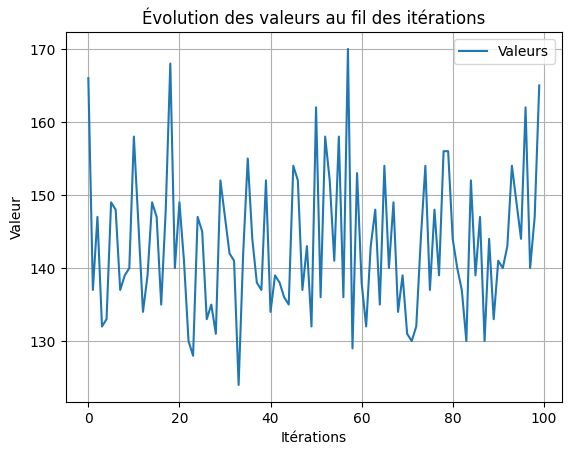

In [41]:
plt.plot(values, label="Valeurs")
plt.xlabel("Itérations")
plt.ylabel("Valeur")
plt.title("Évolution des valeurs au fil des itérations")
plt.legend()
plt.grid(True)
plt.show()

Path: [(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (23, 'Biscuit_3'), (33, 'Biscuit_1'), (36, 'Biscuit_3'), (37, 'Biscuit_2'), (40, 'Biscuit_0'), (44, 'Biscuit_0'), (46, 'Biscuit_2'), (48, 'Biscuit_2'), (50, 'Biscuit_2'), (54, 'Biscuit_0'), (59, 'Biscuit_3'), (67, 'Biscuit_1'), (75, 'Biscuit_1'), (83, 'Biscuit_1'), (71, 'Biscuit_1'), (79, 'Biscuit_1'), (87, 'Biscuit_1'), (89, 'Biscuit_2'), (97, 'Biscuit_1')]


In [53]:
biscuit_method_1 = BiscuitOptimization(data)

method_1_result = biscuit_method_1.method_1()

# Affichage de la meilleure solution
print("Best solution found:")
print("Path:", method_1_result[1])
print("Total value:", method_1_result[0])

500
State(pos=8 
path=[(8, 'Biscuit_1')] 
value=12)
State(pos=16 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1')] 
value=24)
State(pos=24 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1')] 
value=36)
State(pos=32 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1')] 
value=48)
State(pos=40 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1')] 
value=60)
State(pos=45 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1'), (45, 'Biscuit_3')] 
value=68)
State(pos=53 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1'), (45, 'Biscuit_3'), (53, 'Biscuit_1')] 
value=80)
State(pos=61 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1'), (45, 'Biscuit_3'), (53, 'Biscuit_1'), (61, 'Biscuit_1')] 
value=92)
State(pos=63 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'

IndexError: list index out of range

In [55]:
biscuit_method_1 = BiscuitOptimization(data)

method_1_result = biscuit_method_1.method_1()

# Affichage de la meilleure solution
print("Best solution found:")
print("Path:", method_1_result[1])
print("Total value:", method_1_result[0])

500
State(pos=8 
path=[(8, 'Biscuit_1')] 
value=12)
State(pos=16 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1')] 
value=24)
State(pos=24 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1')] 
value=36)
State(pos=32 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1')] 
value=48)
State(pos=40 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1')] 
value=60)
State(pos=48 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1'), (48, 'Biscuit_1')] 
value=72)
State(pos=56 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1'), (48, 'Biscuit_1'), (56, 'Biscuit_1')] 
value=84)
State(pos=64 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'), (32, 'Biscuit_1'), (40, 'Biscuit_1'), (48, 'Biscuit_1'), (56, 'Biscuit_1'), (64, 'Biscuit_1')] 
value=96)
State(pos=72 
path=[(8, 'Biscuit_1'), (16, 'Biscuit_1'), (24, 'Biscuit_1'

IndexError: list index out of range

In [57]:
print(biscuit_method_1.defects)

              x class
0    355.449335     c
1     92.496236     a
2    141.876795     c
3    431.833902     c
4    435.028461     c
..          ...   ...
495  171.161186     a
496  365.899255     a
497  157.372180     b
498  275.538229     b
499  143.725148     a

[500 rows x 2 columns]


In [65]:
print(data['x'].sort_values())

479      0.700561
141      0.848185
142      1.769825
493      2.207230
125      2.313038
          ...    
219    496.411441
449    496.429679
243    497.370667
246    498.455612
229    499.403445
Name: x, Length: 500, dtype: float64


In [61]:
print(data.loc[data['x'] < 1, :])


            x class
141  0.848185     a
479  0.700561     a


In [64]:
print(data.loc[(data['x'] < 2) & (data['x'] > 1), :])

            x class
142  1.769825     a


In [85]:
dtest = pd.read_csv('../DATA/defects.csv', sep=',', index_col='x')
dtest.head()

,class
x,
355.449335,c
92.496236,a
141.876795,c
431.833902,c
435.028461,c


In [86]:
dtest = dtest.sort_index()

In [87]:

print(biscuit_method_1._chunks)

[Chunk(position=0, defects={'a': 2}, is occupied=False), Chunk(position=1, defects={'a': 1}, is occupied=False), Chunk(position=2, defects={'a': 1, 'b': 1}, is occupied=False), Chunk(position=3, defects={'b': 1, 'a': 1}, is occupied=False), Chunk(position=4, defects={}, is occupied=False), Chunk(position=5, defects={}, is occupied=False), Chunk(position=6, defects={}, is occupied=False), Chunk(position=7, defects={}, is occupied=False), Chunk(position=8, defects={'c': 1}, is occupied=True), Chunk(position=9, defects={'c': 2}, is occupied=True), Chunk(position=10, defects={'c': 1, 'b': 1}, is occupied=True), Chunk(position=11, defects={}, is occupied=True), Chunk(position=12, defects={'a': 1}, is occupied=True), Chunk(position=13, defects={}, is occupied=True), Chunk(position=14, defects={'a': 1}, is occupied=True), Chunk(position=15, defects={}, is occupied=True), Chunk(position=16, defects={'a': 1, 'c': 1}, is occupied=True), Chunk(position=17, defects={}, is occupied=True), Chunk(pos

In [90]:
dtest.tail(20)

,class
x,
482.601670,a
483.649325,c
483.863339,c
483.988338,a
484.160670,b
484.213049,a
484.328731,a
484.662445,b
487.231627,c


In [92]:
dtest.head(20)

,class
x,
0.700561,a
0.848185,a
1.769825,a
2.207230,b
2.313038,a
3.701164,a
3.998342,b
8.757472,c
9.122731,c
